In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [87]:
from xgboost import XGBRegressor
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler

from sklearn.model_selection import GridSearchCV, TimeSeriesSplit

# 1. Load dataset

In [88]:
df = pd.read_csv(r'..\..\data\preprocessed_dataset.csv')
df.head(10)

,date,cpi_rate,xau_usd_rate_log_return,pe_ratio_log_return,fpt_stock_price,gdp_value,fpt_stock_price_log_return,cpi_rate_log_return,usd_vnd_rate_log_return,fpt_stock_volume_log_return
0,2020-01-01,0.0643,0.999818,-0.020095,21.39,3.466157e+11,-0.055765,0.01877,0.067868,-0.003521
1,2020-01-02,0.0643,0.999818,-0.020095,21.39,3.466157e+11,-0.055765,0.01877,0.067868,-0.003521
2,2020-01-03,0.0643,1.626549,-0.020095,21.03,3.466157e+11,-1.040504,0.01877,-0.081355,1.709207
3,2020-01-06,0.0643,2.133883,-0.020095,20.81,3.466157e+11,-0.665883,0.01877,0.040724,-1.308273
4,2020-01-07,0.0643,-0.470972,-0.020095,21.21,3.466157e+11,1.048811,0.01877,-0.027099,-0.553839
5,2020-01-08,0.0643,2.422935,-0.020095,20.73,3.466157e+11,-1.383803,0.01877,0.000023,1.600369
6,2020-01-09,0.0643,-3.779823,-0.020095,21.03,3.466157e+11,0.777814,0.01877,-0.081348,-1.308467
7,2020-01-10,0.0643,0.067705,-0.020095,20.99,3.466157e+11,-0.166219,0.01877,0.623509,0.104292
8,2020-01-13,0.0643,-0.140615,-0.020095,20.84,3.466157e+11,-0.471852,0.01877,-0.813336,-0.539251
9,2020-01-14,0.0643,-1.100394,-0.020095,20.81,3.466157e+11,-0.139342,0.01877,-0.040661,-0.182591


In [89]:
train, test = train_test_split(df, test_size=0.15, shuffle=False)

In [90]:
print(type(train))
train

<class 'pandas.core.frame.DataFrame'>


,date,cpi_rate,xau_usd_rate_log_return,pe_ratio_log_return,fpt_stock_price,gdp_value,fpt_stock_price_log_return,cpi_rate_log_return,usd_vnd_rate_log_return,fpt_stock_volume_log_return
0,2020-01-01,0.0643,0.999818,-0.020095,21.39,3.466157e+11,-0.055765,0.01877,0.067868,-0.003521
1,2020-01-02,0.0643,0.999818,-0.020095,21.39,3.466157e+11,-0.055765,0.01877,0.067868,-0.003521
2,2020-01-03,0.0643,1.626549,-0.020095,21.03,3.466157e+11,-1.040504,0.01877,-0.081355,1.709207
3,2020-01-06,0.0643,2.133883,-0.020095,20.81,3.466157e+11,-0.665883,0.01877,0.040724,-1.308273
4,2020-01-07,0.0643,-0.470972,-0.020095,21.21,3.466157e+11,1.048811,0.01877,-0.027099,-0.553839
...,...,...,...,...,...,...,...,...,...,...
1294,2024-11-12,0.0289,-2.713658,-0.020095,117.14,4.338577e+11,-0.686274,0.01877,0.565950,-1.239176
1295,2024-11-13,0.0289,-0.446362,-0.020095,117.99,4.338577e+11,0.363696,0.01877,0.094526,0.347727
1296,2024-11-14,0.0289,-1.773756,-0.020095,116.45,4.338577e+11,-0.817974,0.01877,0.973674,0.650414
1297,2024-11-15,0.0289,-0.326552,-0.020095,114.65,4.338577e+11,-0.959539,0.01877,-0.239865,0.673369


In [91]:
test

,date,cpi_rate,xau_usd_rate_log_return,pe_ratio_log_return,fpt_stock_price,gdp_value,fpt_stock_price_log_return,cpi_rate_log_return,usd_vnd_rate_log_return,fpt_stock_volume_log_return
1299,2024-11-19,0.0289,1.031349,-0.020095,111.31,4.338577e+11,-1.816531,0.01877,-0.054225,1.388691
1300,2024-11-20,0.0289,0.633560,-0.020095,113.37,4.338577e+11,1.008117,0.01877,0.131270,0.207916
1301,2024-11-21,0.0289,0.742293,-0.020095,113.88,4.338577e+11,0.204638,0.01877,0.168296,-2.034223
1302,2024-11-22,0.0289,1.642826,-0.020095,114.65,4.338577e+11,0.335191,0.01877,-0.091306,-0.181840
1303,2024-11-25,0.0289,0.297915,-0.020095,114.65,4.338577e+11,-0.055765,0.01877,-0.239665,-0.945066
...,...,...,...,...,...,...,...,...,...,...
1524,2025-09-24,0.0324,-0.434974,-0.020095,99.50,4.763882e+11,0.825509,0.01877,-0.149365,-1.874443
1525,2025-09-25,0.0324,-0.634456,-0.020095,98.00,4.763882e+11,-0.937040,0.01877,-0.149379,0.308926
1526,2025-09-26,0.0324,0.623868,-0.020095,97.50,4.763882e+11,-0.352523,0.01877,-0.185086,-0.139339
1527,2025-09-29,0.0324,1.502127,-0.020095,95.50,4.763882e+11,-1.258215,0.01877,0.207470,0.525929


In [92]:
scaler_fpt = StandardScaler()
scaler_gdp = StandardScaler()

def process_data(dataset, is_train=True):
    df_out = dataset.copy()
    
    col_fpt = ['fpt_stock_price']
    col_gdp = ['gdp_value']

    if is_train:
        df_out[col_fpt] = scaler_fpt.fit_transform(df_out[col_fpt])
        df_out[col_gdp] = scaler_gdp.fit_transform(df_out[col_gdp])
    else:
        df_out[col_fpt] = scaler_fpt.transform(df_out[col_fpt])
        df_out[col_gdp] = scaler_gdp.transform(df_out[col_gdp])
        
    return df_out

In [93]:
train_scaled = process_data(train, is_train=True)
test_scaled = process_data(test, is_train=False)

In [94]:
train_scaled.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1299 entries, 0 to 1298
Data columns (total 10 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   date                         1299 non-null   object 
 1   cpi_rate                     1299 non-null   float64
 2   xau_usd_rate_log_return      1299 non-null   float64
 3   pe_ratio_log_return          1299 non-null   float64
 4   fpt_stock_price              1299 non-null   float64
 5   gdp_value                    1299 non-null   float64
 6   fpt_stock_price_log_return   1299 non-null   float64
 7   cpi_rate_log_return          1299 non-null   float64
 8   usd_vnd_rate_log_return      1299 non-null   float64
 9   fpt_stock_volume_log_return  1299 non-null   float64
dtypes: float64(9), object(1)
memory usage: 111.6+ KB


# 2. Train with XGBoost

## 2.1. Prepare

In [95]:
LAG_FEATURES = ['fpt_stock_price', 'fpt_stock_volume_log_return']

LAG_DAYS = [1, 2]

for feature in LAG_FEATURES:
    for lag in LAG_DAYS:
        df[f'{feature}_lag{lag}'] = df[feature].shift(lag)

df_lagged = df.dropna()

df_lagged['date'] = pd.to_datetime(df_lagged['date'])
df_lagged = df_lagged.set_index('date')


print("--- DataFrame sau khi tạo Lagged Features ---")
print(df_lagged.head())

scaler_fpt = StandardScaler()
scaler_gdp = StandardScaler()

train_lagged, test_lagged = train_test_split(df_lagged, test_size=0.15, shuffle=False)

train_scaled = process_data(train_lagged, is_train=True)
test_scaled = process_data(test_lagged, is_train=False)



--- DataFrame sau khi tạo Lagged Features ---
            cpi_rate  xau_usd_rate_log_return  pe_ratio_log_return  \
date                                                                 
2020-01-03    0.0643                 1.626549            -0.020095   
2020-01-06    0.0643                 2.133883            -0.020095   
2020-01-07    0.0643                -0.470972            -0.020095   
2020-01-08    0.0643                 2.422935            -0.020095   
2020-01-09    0.0643                -3.779823            -0.020095   

            fpt_stock_price     gdp_value  fpt_stock_price_log_return  \
date                                                                    
2020-01-03            21.03  3.466157e+11                   -1.040504   
2020-01-06            20.81  3.466157e+11                   -0.665883   
2020-01-07            21.21  3.466157e+11                    1.048811   
2020-01-08            20.73  3.466157e+11                   -1.383803   
2020-01-09            21.

C:\Users\VICTUS\AppData\Local\Temp\ipykernel_22344\4283915778.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_lagged['date'] = pd.to_datetime(df_lagged['date'])


In [96]:
TARGET_COL = 'fpt_stock_price_log_return' 

y_train_scaled = train_scaled[TARGET_COL]
X_train_scaled = train_scaled.drop(columns=[TARGET_COL, 'fpt_stock_price'])

y_test_scaled = test_scaled[TARGET_COL]
X_test_scaled = test_scaled.drop(columns=[TARGET_COL, 'fpt_stock_price'])

In [97]:
y_train_scaled

date
2020-01-03   -1.040504
2020-01-06   -0.665883
2020-01-07    1.048811
2020-01-08   -1.383803
2020-01-09    0.777814
                ...   
2024-11-12   -0.686274
2024-11-13    0.363696
2024-11-14   -0.817974
2024-11-15   -0.959539
2024-11-18   -0.010240
Name: fpt_stock_price_log_return, Length: 1297, dtype: float64

In [98]:
X_train_scaled

,cpi_rate,xau_usd_rate_log_return,pe_ratio_log_return,gdp_value,cpi_rate_log_return,usd_vnd_rate_log_return,fpt_stock_volume_log_return,fpt_stock_price_lag1,fpt_stock_price_lag2,fpt_stock_volume_log_return_lag1,fpt_stock_volume_log_return_lag2
date,,,,,,,,,,,
2020-01-03,0.0643,1.626549,-0.020095,-0.953595,0.01877,-0.081355,1.709207,21.39,21.39,-0.003521,-0.003521
2020-01-06,0.0643,2.133883,-0.020095,-0.953595,0.01877,0.040724,-1.308273,21.03,21.39,1.709207,-0.003521
2020-01-07,0.0643,-0.470972,-0.020095,-0.953595,0.01877,-0.027099,-0.553839,20.81,21.03,-1.308273,1.709207
2020-01-08,0.0643,2.422935,-0.020095,-0.953595,0.01877,0.000023,1.600369,21.21,20.81,-0.553839,-1.308273
2020-01-09,0.0643,-3.779823,-0.020095,-0.953595,0.01877,-0.081348,-1.308467,20.73,21.21,1.600369,-0.553839
...,...,...,...,...,...,...,...,...,...,...,...
2024-11-12,0.0289,-2.713658,-0.020095,1.512026,0.01877,0.565950,-1.239176,118.42,116.28,1.906385,-1.099084
2024-11-13,0.0289,-0.446362,-0.020095,1.512026,0.01877,0.094526,0.347727,117.14,118.42,-1.239176,1.906385
2024-11-14,0.0289,-1.773756,-0.020095,1.512026,0.01877,0.973674,0.650414,117.99,117.14,0.347727,-1.239176


## 2.2. Train

### 2.2.1. GridSearch

In [99]:
eval_set = [(X_test_scaled, y_test_scaled)]

In [100]:
param_grid = {
    'max_depth': [4, 6, 8],
    'learning_rate': [0.05, 0.1, 0.2],
    'n_estimators': [200, 500],
    'reg_alpha': [0, 0.05, 0.5], 
    'reg_lambda': [0.001, 0.1, 1],
    'min_child_weight': [1, 5, 10]
}

In [101]:
base_model = XGBRegressor(
    random_state=42, 
    n_jobs=-1,
    subsample=0.8, 
    colsample_bytree=0.8,
)
print("Đã khởi tạo mô hình cơ sở.")

Đã khởi tạo mô hình cơ sở.


In [102]:
tscv = TimeSeriesSplit(n_splits=5) 

grid_search = GridSearchCV(
    estimator=base_model,
    param_grid=param_grid,
    scoring='neg_mean_squared_error',
    cv=tscv,
    verbose=2,
    error_score='raise'
)

grid_search.fit(X_train_scaled, y_train_scaled)

print("Best parameters found: ", grid_search.best_params_)
print("Best Score (Negative MSE): ", grid_search.best_score_)

Fitting 5 folds for each of 486 candidates, totalling 2430 fits
[CV] END learning_rate=0.05, max_depth=4, min_child_weight=1, n_estimators=200, reg_alpha=0, reg_lambda=0.001; total time=   0.1s
[CV] END learning_rate=0.05, max_depth=4, min_child_weight=1, n_estimators=200, reg_alpha=0, reg_lambda=0.001; total time=   0.0s
[CV] END learning_rate=0.05, max_depth=4, min_child_weight=1, n_estimators=200, reg_alpha=0, reg_lambda=0.001; total time=   0.0s
[CV] END learning_rate=0.05, max_depth=4, min_child_weight=1, n_estimators=200, reg_alpha=0, reg_lambda=0.001; total time=   0.0s
[CV] END learning_rate=0.05, max_depth=4, min_child_weight=1, n_estimators=200, reg_alpha=0, reg_lambda=0.001; total time=   0.0s
[CV] END learning_rate=0.05, max_depth=4, min_child_weight=1, n_estimators=200, reg_alpha=0, reg_lambda=0.1; total time=   0.1s
[CV] END learning_rate=0.05, max_depth=4, min_child_weight=1, n_estimators=200, reg_alpha=0, reg_lambda=0.1; total time=   0.1s
[CV] END learning_rate=0.05, m

### 2.2.2. Training

In [111]:
model_xgboost = XGBRegressor(
    random_state=42, 
    n_jobs=-1,
    subsample=0.8, 
    colsample_bytree=0.8,
    learning_rate = 0.05,
    max_depth = 4,
    min_child_weight = 10,
    n_estimator = 200,
    reg_alpha = 0.5,
    reg_lambda = 1
)


In [114]:
model_xgboost.fit(X_train_scaled, y_train_scaled)

c:\Users\VICTUS\Documents\developer\UIT_year3_sem1\stock-price-analysis\venv\lib\site-packages\xgboost\training.py:199: UserWarning: [21:04:59] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:790: 
Parameters: { "n_estimator" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


,objective,'reg:squarederror'
,base_score,None
,booster,None
,callbacks,None
,colsample_bylevel,None
,colsample_bynode,None
,colsample_bytree,0.8
,device,None
,early_stopping_rounds,None
,enable_categorical,False
,eval_metric,None


## 2.3. Predict

In [115]:
X_test_scaled.head(3)

,cpi_rate,xau_usd_rate_log_return,pe_ratio_log_return,gdp_value,cpi_rate_log_return,usd_vnd_rate_log_return,fpt_stock_volume_log_return,fpt_stock_price_lag1,fpt_stock_price_lag2,fpt_stock_volume_log_return_lag1,fpt_stock_volume_log_return_lag2
date,,,,,,,,,,,
2024-11-19,0.0289,1.031349,-0.020095,1.512026,0.01877,-0.054225,1.388691,114.74,114.65,-1.080745,0.673369
2024-11-20,0.0289,0.633560,-0.020095,1.512026,0.01877,0.131270,0.207916,111.31,114.74,1.388691,-1.080745
2024-11-21,0.0289,0.742293,-0.020095,1.512026,0.01877,0.168296,-2.034223,113.37,111.31,0.207916,1.388691


In [116]:
y_train_pred_scaled = model_xgboost.predict(X_train_scaled)
y_pred_scaled = model_xgboost.predict(X_test_scaled)
print("Đã dự đoán thành công. Kết quả là các giá trị đã được scale.")

Đã dự đoán thành công. Kết quả là các giá trị đã được scale.


In [117]:
scaler_target = scaler_fpt

y_train_pred_actual = scaler_target.inverse_transform(y_train_pred_scaled.reshape(-1, 1)).flatten()
y_pred_actual = scaler_target.inverse_transform(y_pred_scaled.reshape(-1, 1)).flatten()
y_test_actual = scaler_target.inverse_transform(y_test_scaled.values.reshape(-1, 1)).flatten()

In [122]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np

rmse = np.sqrt(mean_squared_error(y_test_actual, y_pred_actual))
mae = mean_absolute_error(y_test_actual, y_pred_actual)

def calculate_r2(y_actual, y_predicted):
    """
    Tính toán Hệ số Xác định R-squared.

    Args:
        y_actual (np.ndarray): Mảng giá trị thực tế (Actual).
        y_predicted (np.ndarray): Mảng giá trị dự đoán (Predicted).

    Returns:
        float: Giá trị R-squared.
    """
    y_actual_flat = y_actual.flatten()
    y_predicted_flat = y_predicted.flatten()
    r2 = r2_score(y_actual_flat, y_predicted_flat)
    
    return r2
r2_value = calculate_r2(y_test_actual, y_pred_actual)

print(f"Giá trị RMSE (Lỗi trung bình bình phương gốc)  : {rmse:.2f}")
print(f"Giá trị MAE (Lỗi tuyệt đối trung bình)         : {mae:.2f}")
print(f"Giá trị R-squared                              : {r2_value:.4f}")

Giá trị RMSE (Lỗi trung bình bình phương gốc)  : 29.02
Giá trị MAE (Lỗi tuyệt đối trung bình)         : 19.38
Giá trị R-squared                              : -0.0559


In [123]:
y_train_actual = scaler_target.inverse_transform(y_train_scaled.values.reshape(-1, 1)).flatten()
train_results_df = pd.DataFrame(
    data={
        'Actual Price': y_train_actual.flatten(),
        'Predicted Price': y_train_pred_actual.flatten()
    },
    index=X_train_scaled.index
)
test_results_df = pd.DataFrame(
    data={
        'Actual Price': y_test_actual.flatten(),
        'Predicted Price': y_pred_actual.flatten()
    },
    index=X_test_scaled.index
)

In [124]:
DAYS_TO_SHOW = 50 
recent_train_results_df = train_results_df.iloc[-DAYS_TO_SHOW:]
full_results_df_recent = pd.concat([recent_train_results_df, test_results_df])

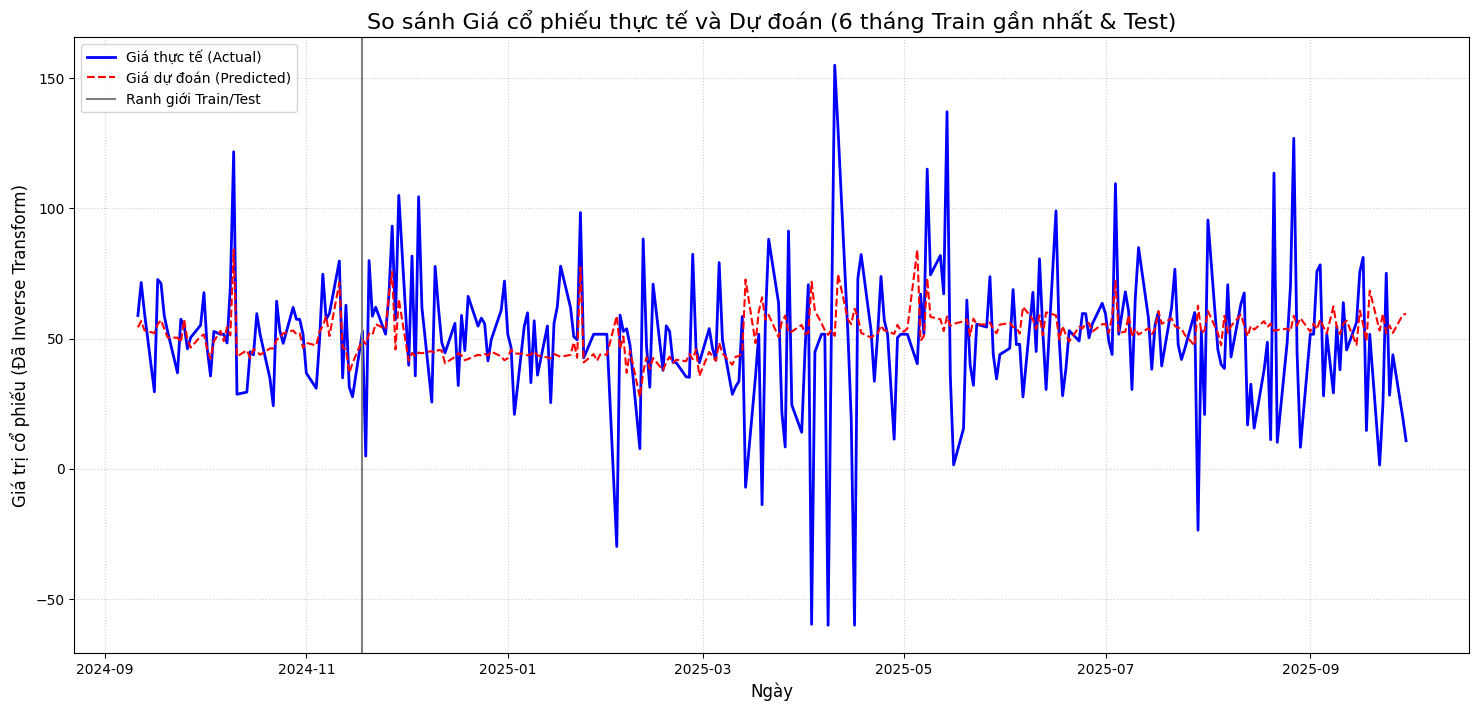

In [125]:
plt.figure(figsize=(18, 8))

plt.plot(full_results_df_recent.index, full_results_df_recent['Actual Price'], 
         label='Giá thực tế (Actual)', color='blue', linewidth=2)

plt.plot(full_results_df_recent.index, full_results_df_recent['Predicted Price'], 
         label='Giá dự đoán (Predicted)', color='red', linestyle='--', linewidth=1.5)

split_index_loc = X_train_scaled.index[-1]
plt.axvline(x=split_index_loc, color='gray', linestyle='-', linewidth=1.5, label='Ranh giới Train/Test')

plt.title('So sánh Giá cổ phiếu thực tế và Dự đoán (6 tháng Train gần nhất & Test)', fontsize=16)
plt.xlabel('Ngày', fontsize=12)
plt.ylabel('Giá trị cổ phiếu (Đã Inverse Transform)', fontsize=12)
plt.legend(loc='upper left', fontsize=10)
plt.grid(True, linestyle=':', alpha=0.6)

plt.show()